|    |   Processors |   Time Used |         Sum |   Sum of Square |   Speedup |   Efficiency |
|---:|-------------:|------------:|------------:|----------------:|----------:|-------------:|
|  0 |            1 |   24.3069   | 3.01716e+07 |     6.862e+09   |  1        |     1        |
|  1 |            1 |   24.3469   | 3.01716e+07 |     6.862e+09   |  0.998357 |     0.998357 |
|  2 |            4 |   12.3164   | 3.01711e+07 |     6.86199e+09 |  1.97354  |     0.493385 |
|  3 |            9 |    5.69145  | 3.01659e+07 |     6.86193e+09 |  4.27077  |     0.474531 |
|  4 |           16 |    3.18266  | 3.01702e+07 |     6.86197e+09 |  7.63729  |     0.477331 |
|  5 |           25 |    7.52991  | 3.01715e+07 |     6.86201e+09 |  3.22805  |     0.129122 |
|  6 |           36 |    0.705498 | 3.01365e+07 |     6.86163e+09 | 34.4535   |     0.957043 |


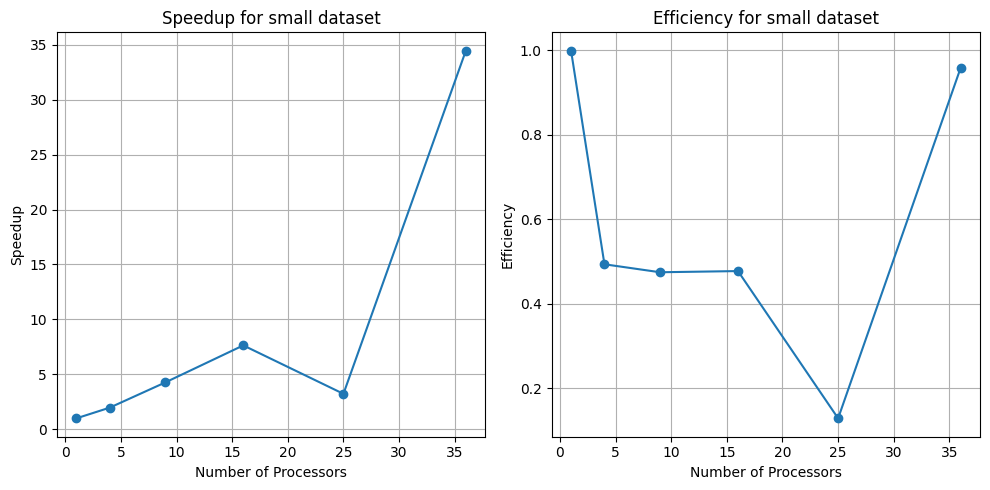

|    |   Processors |   Time Used |         Sum |   Sum of Square |   Speedup |   Efficiency |
|---:|-------------:|------------:|------------:|----------------:|----------:|-------------:|
|  0 |            1 |    97.2765  | 1.13255e+08 |     1.40519e+10 |   1       |     1        |
|  1 |            1 |    96.6835  | 1.13255e+08 |     1.40519e+10 |   1.00613 |     1.00613  |
|  2 |            4 |    48.4839  | 1.13359e+08 |     1.40541e+10 |   2.00637 |     0.501592 |
|  3 |            9 |    22.2486  | 1.12758e+08 |     1.40455e+10 |   4.37225 |     0.485806 |
|  4 |           16 |    12.2718  | 1.12278e+08 |     1.40465e+10 |   7.92683 |     0.495427 |
|  5 |           25 |    27.8985  | 1.12026e+08 |     1.40411e+10 |   3.4868  |     0.139472 |
|  6 |           36 |     2.82327 | 1.11682e+08 |     1.40382e+10 |  34.4553  |     0.957091 |


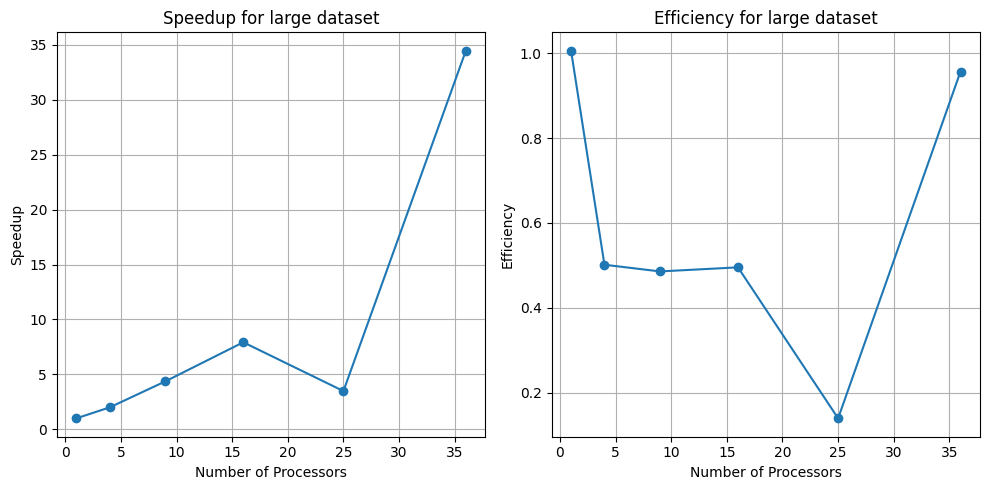

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
def read_everything_from_file(filename):
    latency = 0
    sum_value = 0  # Renamed to avoid conflict with built-in 'sum'
    sum_of_square = 0
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("Time:"):
                latency = float(line.split()[1])
            elif line.startswith("Sum is:"):
                sum_value = float(line.split()[2])
            elif line.startswith("Sum of square is:"):
                sum_of_square = float(line.split()[4])
    return latency, sum_value, sum_of_square

def plot_speedup_efficiency(df, dataset_name):
    plt.figure(figsize=(10, 5))

    # Plot speedup
    plt.subplot(1, 2, 1)
    plt.plot(df['Processors'], df['Speedup'], marker='o', label='Speedup')
    plt.xlabel('Number of Processors')
    plt.ylabel('Speedup')
    plt.title(f'Speedup for {dataset_name} dataset')
    plt.grid(True)

    # Plot efficiency
    plt.subplot(1, 2, 2)
    plt.plot(df['Processors'], df['Efficiency'], marker='o', label='Efficiency')
    plt.xlabel('Number of Processors')
    plt.ylabel('Efficiency')
    plt.title(f'Efficiency for {dataset_name} dataset')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

files = {
    'small': {
        1: 'parallel-small-1.txt',
        4: 'parallel-small-4.txt',
        9 : 'parallel-small-9.txt',
        16: 'parallel-small-16.txt',
        25: 'parallel-small-25.txt',
        36: 'parallel-small-36.txt',
        'serial': 'serial-small.txt'
    },
    'large': {
        1: 'parallel-large-1.txt',
        4: 'parallel-large-4.txt',
        9 : 'parallel-large-9.txt',
        16: 'parallel-large-16.txt',
        25: 'parallel-large-25.txt',
        36: 'parallel-large-36.txt',
        'serial': 'serial-large.txt'
    }
}

for dataset_size in ['small', 'large']:

    serial_latency, serial_sum, serial_sum_of_square = read_everything_from_file(files[dataset_size]['serial'])

    parallel_times = {p: read_everything_from_file(files[dataset_size][p]) for p in [1, 4, 9, 16, 25, 36]}

    data = {
        'Processors': [1, 1, 4, 9, 16, 25, 36],
        'Time Used': [serial_latency] + [parallel_times[p][0] for p in [1, 4, 9, 16, 25, 36]],
        'Sum': [serial_sum] + [parallel_times[p][1] for p in [1, 4, 9, 16, 25, 36]],
        'Sum of Square': [serial_sum_of_square] + [parallel_times[p][2] for p in [1, 4, 9, 16, 25, 36]]
    }

    df = pd.DataFrame(data)
    # print(df.to_markdown())

    # calculate speedup and efficiency
    df['Speedup'] = df['Time Used'][0] / df['Time Used']
    df['Efficiency'] = df['Speedup'] / df['Processors']
    print(df.to_markdown())

    # remove first row (serial)
    df = df.iloc[1:]

    # draw the speed up and efficiency plot
    plot_speedup_efficiency(df, dataset_size)
    
